# Machine Learning Algorithm Performance Metrics

**Metrics for Classification Problem:**
1. Classification Accuracy.
2. Logarithmic Loss.
3. Area Under ROC Curve.
4. Confusion Matrix.
5. Classification Report.

**Metrics for Classification Problem:**
1. Mean Absolute Error.
2. Mean Squared Error.
3. R-Square

Accuracy : No. of Correct Prediction's to the overall Predictions [Most Common and Misused]
    Drawback : suitable if and only if classes are balanced.
    

In [15]:
#import modules
import warnings
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import accuracy_score
#ignore warnings
warnings.filterwarnings('ignore')
# Load digits dataset
iris = datasets.load_iris()
# # Create feature matrix
X = iris.data
# Create target vector
y = iris.target
#test size
test_size = 0.33
#generate the same set of random numbers
seed = 7
#cross-validation settings
kfold = model_selection.KFold(n_splits=10)
#Model instance
model = LogisticRegression()
#Evaluate model performance
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print('Accuracy -val set: %.2f%% (%.2f)' % (results.mean()*100, results.std()))

#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
#fit model
model.fit(X_train, y_train)
#accuracy on test set
result = model.score(X_test, y_test)
print("Accuracy - test set: %.2f%%" % (result*100.0))

Accuracy -val set: 94.67% (0.06)
Accuracy - test set: 92.00%


### Confusion Matrix

Confusion Matrix as the name suggests gives us a matrix as output and describes the complete performance of the model.
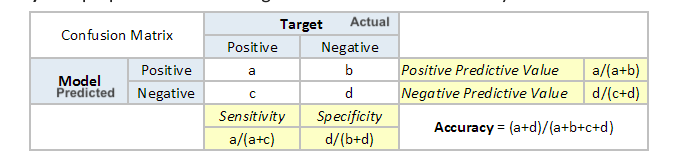


True Positives (A) : The cases in which we predicted YES and the actual output was also YES.

True Negatives (D) : The cases in which we predicted NO and the actual output was NO.

False Positive (B): signifies how many negative class samples your model predicted incorrectly. This factor represents Type-I error in statistical nomenclature

False Negatives (C) : signifies how many positive class samples your model predicted incorrectly. This factor represents Type-II error in statistical nomenclature. 


**Accuracy**: (TP+TN)/(All) Not Suitable for Imabalanced Dataset

**Precision** : TP/(TP+FP)  :  --Deals With Predicted +ve in deno [Suitable for Imbalanced Class]
    1. the proportion of positive cases that were correctly identified. 
    2. The precision metric focuses on Type-I errors(FP)
    3. 0<P<1 ... 
    4. A precision score towards 1 will signify that your model didn’t miss any true positives, and is able to classify well between correct and incorrect labeling
    5. A low precision score (<0.5) means your classifier has a high number of false positives which can be an outcome of imbalanced class 

**TPR (Sensitivity) Recall** :  Suitable for imbalanced Data -- Deals with Actual Values in Denominator for +ve
    1. Actual Positive cases correctly Identified  TP/ (FN+TP).
    2. 0<R<1
    3. The recall metric focuses on type-II errors(FN).
    4. A low recall score (<0.5) means your classifier has a high number of false negatives which can be an outcome of imbalanced class
    5. Recall towards 1 will signify that your model didn’t miss any true positives, 

__To improve your model, you can either improve precision or recall – but not both!__



**True Negative Rate (Specificity)** :TN / (FP+TN).
    1. Deals With Actual -ve correctly Classified
    2. (true negatives / all actual negatives)

**False Positive Rate** :  FP / (FP+TN)

    1. [0 ,1]


**Negative Predictive Value**:TN(TN+FN) the proportion of negative cases correctly identified --DEALS WITH PREDICTED



**False Positive Rate** : False Positive Rate is defined as FP / (FP+TN). 

False Positive Rate and True Positive Rate both have values in the range [0, 1].

**Precision & Recall When classes are imbalanced** actual negatives are less relevant. E.g. cancer patients identifying actual +ve more important

**Specificity & NPV** : We use both metrics when actual positives are less relevant E.g. identify new potential users where marketing can be useful 


[[13  0  0]
 [ 0 17  2]
 [ 0  0 18]]


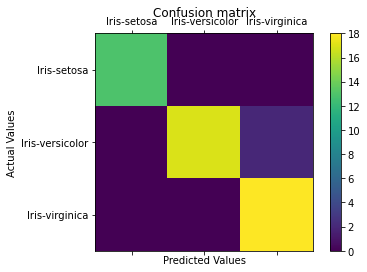

In [13]:
import warnings
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline  

#ignore warnings
warnings.filterwarnings('ignore')
# Load digits dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url)
# df = df.values
X = df.iloc[:,0:4]
y = df.iloc[:,4]
#test size
test_size = 0.33
#generate the same set of random numbers
seed = 7
#Split data into train and test set. 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
#Train Model
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

#Construct the Confusion Matrix
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
cm = confusion_matrix(y_test, pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

### Area Under Curve
TPR vs. FPR
Area Under Curve(AUC) is one of the most widely used metrics for evaluation. It is used for binary classification problem.

AUC has a range of [0, 1]. The greater the value, the better is the performance of our model.

Logarithmic Loss:
    Logarithmic loss (or logloss) is a performance metric for evaluating the predictions of probabilities
of membership to a given class. The scalar probability between 0 and 1 can be seen as a measure
of con dence for a prediction by an algorithm. Predictions that are correct or incorrect are
rewarded or punished proportionally to the con dence of the prediction.

Log Loss has no upper bound and it exists on the range [0, ∞). Log Loss nearer to 0 indicates higher accuracy, whereas if the Log Loss is away from 0 then it indicates lower accuracy.

In general, minimising Log Loss gives greater accuracy for the classifier.

### F1 Score

F1 Score is the Harmonic Mean between precision and recall. The range for F1 Score is [0, 1]. 
It tells you how precise your classifier is (how many instances it classifies correctly), as well as how robust it is
(it does not miss a significant number of instances).
F1 Score tries to find the balance between precision and recall.

High precision but lower recall, gives you an extremely accurate, but it then misses a large number of instances that are difficult to classify.The greater the F1 Score, the better is the performance of our model.

### Mean Absolute Error
The Mean Absolute Error (or MAE) is the sum of the absolute di erences between predictions
and actual values. It gives an idea of how wrong the predictions were. The measure gives an
idea of the magnitude of the error, but no idea of the direction (e.g. over or under predicting).

### Mean Squared Error

The Mean Squared Error (or MSE) is much like the mean absolute error in that it provides a
gross idea of the magnitude of error. Taking the square root of the mean squared error converts
the units back to the original units of the output variable and can be meaningful for description
and presentation. This is called the Root Mean Squared Error (or RMSE).

### R2 Metric

The R2 (or R Squared) metric provides an indication of the goodness of  t of a set of predictions
to the actual values. In statistical literature this measure is called the coe cient of determination.
This is a value between 0 and 1 for no- t and perfect  t respectively.